<a href="https://colab.research.google.com/github/hj56775/dlibforbeauty/blob/main/dlib_beauty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import dlib
import cv2
from google.colab.patches import cv2_imshow

In [2]:
#이미지 로드
import numpy as np
import dlib
import cv2
from google.colab.patches import cv2_imshow

RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
MOUTH = list(range(48, 68))
NOSE = list(range(27, 36))
EYEBROWS = list(range(17, 27))
JAWLINE = list(range(1, 17))
ALL = list(range(0, 68))
EYES = list(range(36, 48))


predictor_file = '/content/drive/MyDrive/dlib/model/shape_predictor_68_face_landmarks.dat'

people_image=[]
count=0
for i in range(1,1082):
  name='/content/drive/MyDrive/dlib/image/training_real/real_'
  N=5-len(str(i))
  num=str(0)*N+str(i)
  file_name=name+num+'.jpg'
  image=cv2.imread(file_name)
  people_image.append(image)
  count+=1
  print(count)
MARGIN_RATIO = 1.5
OUTPUT_SIZE = (300, 300)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


KeyboardInterrupt: ignored

Number of faces detected: 1


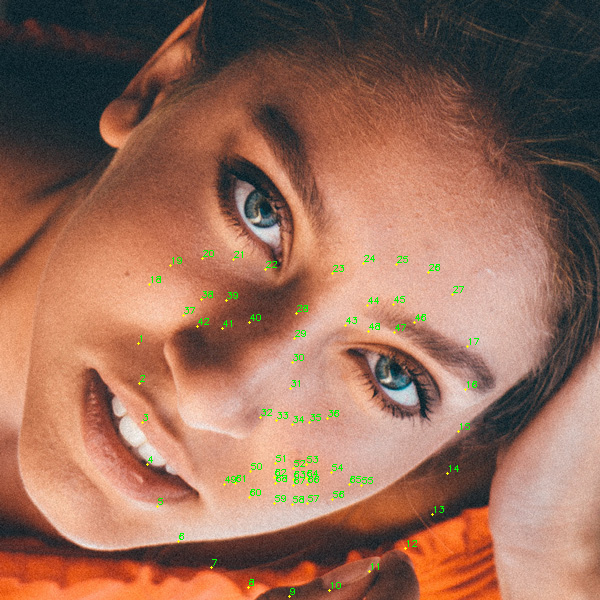

In [10]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_file)
rects = detector(people_image[0], 1)
print("Number of faces detected: {}".format(len(rects)))


for (i, rect) in enumerate(rects):
    points = np.matrix([[p.x, p.y] for p in predictor(people_image[1], rect).parts()])
    show_parts = points[ALL]
    for (i, point) in enumerate(show_parts):
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)
        cv2.putText(image, "{}".format(i + 1), (x, y - 2),
        cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)


cv2_imshow(image)

In [6]:
def rotate_image(image):#이미지 회전, 회전된 이미지 반환
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(predictor_file)
  RIGHT_EYE = list(range(36, 42))
  LEFT_EYE = list(range(42, 48))
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 1)
  for rect in rects:
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    right_eye_center = np.mean(points[RIGHT_EYE], axis = 0).astype("int")
    left_eye_center = np.mean(points[LEFT_EYE], axis = 0).astype("int")

    eye_delta_x = right_eye_center[0,0] - left_eye_center[0,0]
    eye_delta_y = right_eye_center[0,1] - left_eye_center[0,1]
    degree = np.degrees(np.arctan2(eye_delta_y,eye_delta_x)) - 180

    eye_distance = np.sqrt((eye_delta_x ** 2) + (eye_delta_y ** 2))
    aligned_eye_distance = left_eye_center[0,0] - right_eye_center[0,0]
    scale = aligned_eye_distance / eye_distance

    eyes_center = ((left_eye_center[0,0] + right_eye_center[0,0]) // 2,
              (left_eye_center[0,1] + right_eye_center[0,1]) // 2)
    metrix = cv2.getRotationMatrix2D(eyes_center, degree, scale)

    (image_height, image_width) = image.shape[:2]
    warped = cv2.warpAffine(image, metrix, (image_width, image_height),flags=cv2.INTER_CUBIC)
    return warped

In [7]:
def cut_mouth(image):
  MOUTH = list(range(48, 68))
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor(predictor_file)

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   #사진 1개

  rects = detector(gray, 1)

  mouth_list=[]

  for (i, rect) in enumerate(rects):
      points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
      show_parts = points[MOUTH]
      for (i, point) in enumerate(show_parts):
          x = point[0,0]
          y = point[0,1]
          mouth_list.append([x,y])

  max_x=0
  min_x=500
  max_y=0
  min_y=500
  for i in range(len(mouth_list)):
    if max_x < mouth_list[i][0]:
      max_x=mouth_list[i][0]
    if min_x> mouth_list[i][0]:
      min_x=mouth_list[i][0]
    if max_y < mouth_list[i][1]:
      max_y=mouth_list[i][1]
    if min_y> mouth_list[i][1]:
      min_y=mouth_list[i][1]

  cut_image = image[min_y-10:max_y+10, min_x-10:max_x+10]

  return cut_image

In [ ]:
image_file=[]
count=0
for i in people_image:
  try:
    count+=1
    temp_rotate=rotate_image(i)
    temp_mouth=cut_mouth(temp_rotate)
    temp_resize=cv2.resize(temp_mouth,(32,32))
    image_file.append(temp_resize)
    print(count)
  except:
    pass

1
2
3
4
5
6
8
9
10
11
12
13
14
15
16
17
19
20
22
23
24
25
26
27
28
30
31
32
33
35
36
37
38
40
41
42
43
44
45
46
48
49
50
51
52
53
54
55
56
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
84
85
86
87
88
90
92
93
94
95
96
98
99
100
101
102
104
107
108
109
110
111
112
113
114
115
116
117
119
120
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
188
189
190
191
192
193
194
195
196
197
199
200
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
220
221
223
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
251
252
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302

In [5]:
x=np.array(image_file)
y=[]
for i in range(len(image_file)-1):
  y.append(1)
y.append(0)
y=np.array(y)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)

x_train = x_train.astype(np.float64) 
x_test = x_test.astype(np.float64)

x_train = x_train/255.0
x_test  = x_test/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

input_tensor = tf.keras.Input(shape=(32, 32, 3))
resized_images = tf.keras.layers.Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_tensor)

base_model = tf.keras.applications.ResNet101(input_tensor=resized_images,
                                               input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()

dtype('uint8')

In [ ]:
num_classes=2
flatten_layer = tf.keras.layers.Flatten()
prediction_layer = tf.keras.layers.Dense(num_classes, activation = 'softmax')

model = tf.keras.Sequential([
  base_model,
  flatten_layer,
  prediction_layer
])
model.summary()
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint
mc = tf.keras.callbacks.EarlyStopping(min_delta=0, patience=0, verbose=0,
                   mode='auto', baseline=None, restore_best_weights=False)
mc = ModelCheckpoint('/content/drive/MyDrive/dlib/image/', 
                     monitor='val_accuracy', 
                     mode='max', 
                     verbose=1, 
                     save_best_only=True)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')

plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')



[[260 337]] [[353 334]]


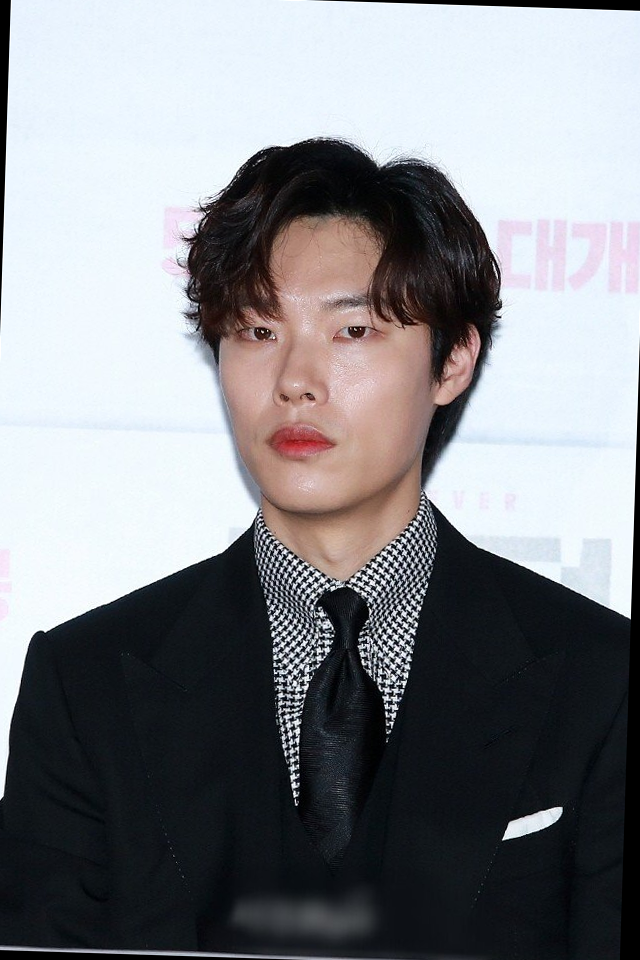

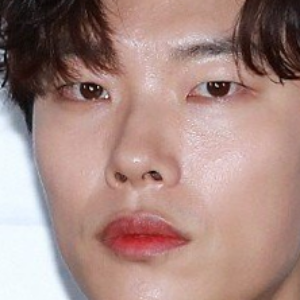

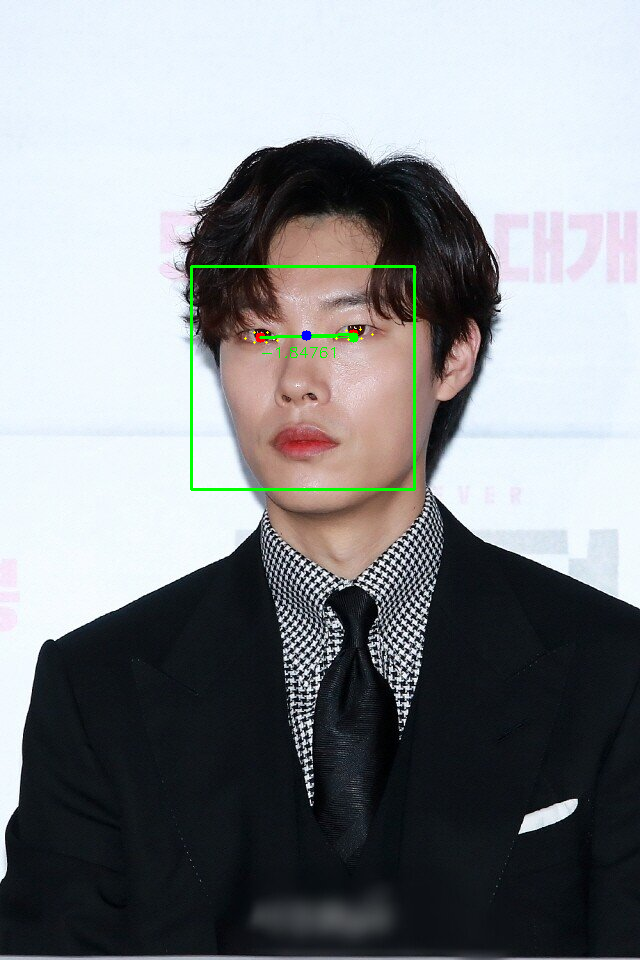

In [ ]:
import numpy as np
import dlib
import cv2
from google.colab.patches import cv2_imshow

RIGHT_EYE = list(range(36, 42))
LEFT_EYE = list(range(42, 48))
EYES = list(range(36, 48))

predictor_file = '/content/drive/MyDrive/dlib/model/shape_predictor_68_face_landmarks.dat'
image_file = '/content/drive/MyDrive/dlib/image/0ee7235fab5267e1581d95d4556824e3.jpeg'

MARGIN_RATIO = 1.5
OUTPUT_SIZE = (300, 300)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_file)

image = cv2.imread(image_file)
#image=people_image[17]
image_origin = image.copy()

(image_height, image_width) = image.shape[:2]
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

rects = detector(gray, 1)

def getFaceDimension(rect):
    return (rect.left(), rect.top(), rect.right() - rect.left(), rect.bottom() - rect.top())

def getCropDimension(rect, center):
    width = (rect.right() - rect.left())
    half_width = width // 2
    (centerX, centerY) = center
    startX = centerX - half_width
    endX = centerX + half_width
    startY = rect.top()
    endY = rect.bottom() 
    return (startX, endX, startY, endY)    

for (i, rect) in enumerate(rects):
    (x, y, w, h) = getFaceDimension(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    show_parts = points[EYES]

    right_eye_center = np.mean(points[RIGHT_EYE], axis = 0).astype("int")
    left_eye_center = np.mean(points[LEFT_EYE], axis = 0).astype("int")
    print(right_eye_center, left_eye_center)
 
    cv2.circle(image, (right_eye_center[0,0], right_eye_center[0,1]), 5, (0, 0, 255), -1)
    cv2.circle(image, (left_eye_center[0,0], left_eye_center[0,1]), 5, (0, 0, 255), -1)
    
    cv2.circle(image, (left_eye_center[0,0], right_eye_center[0,1]), 5, (0, 255, 0), -1)
    
    cv2.line(image, (right_eye_center[0,0], right_eye_center[0,1]),
             (left_eye_center[0,0], left_eye_center[0,1]), (0, 255, 0), 2)
    cv2.line(image, (right_eye_center[0,0], right_eye_center[0,1]),
         (left_eye_center[0,0], right_eye_center[0,1]), (0, 255, 0), 1)
    cv2.line(image, (left_eye_center[0,0], right_eye_center[0,1]),
         (left_eye_center[0,0], left_eye_center[0,1]), (0, 255, 0), 1)

    eye_delta_x = right_eye_center[0,0] - left_eye_center[0,0]
    eye_delta_y = right_eye_center[0,1] - left_eye_center[0,1]
    degree = np.degrees(np.arctan2(eye_delta_y,eye_delta_x)) - 180

    eye_distance = np.sqrt((eye_delta_x ** 2) + (eye_delta_y ** 2))
    aligned_eye_distance = left_eye_center[0,0] - right_eye_center[0,0]
    scale = aligned_eye_distance / eye_distance

    eyes_center = ((left_eye_center[0,0] + right_eye_center[0,0]) // 2,
            (left_eye_center[0,1] + right_eye_center[0,1]) // 2)
    cv2.circle(image, eyes_center, 5, (255, 0, 0), -1)
            
    metrix = cv2.getRotationMatrix2D(eyes_center, degree, scale)
    cv2.putText(image, "{:.5f}".format(degree), (right_eye_center[0,0], right_eye_center[0,1] + 20),
     	 cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

    warped = cv2.warpAffine(image_origin, metrix, (image_width, image_height),
        flags=cv2.INTER_CUBIC)
    
    cv2_imshow(warped)
    (startX, endX, startY, endY) = getCropDimension(rect, eyes_center)
    croped = warped[startY:endY, startX:endX]
    output = cv2.resize(croped, OUTPUT_SIZE)
    cv2_imshow(output)

    for (i, point) in enumerate(show_parts):
        x = point[0,0]
        y = point[0,1]
        cv2.circle(image, (x, y), 1, (0, 255, 255), -1)

cv2_imshow(image)
cv2.waitKey(0)   
cv2.destroyAllWindows()


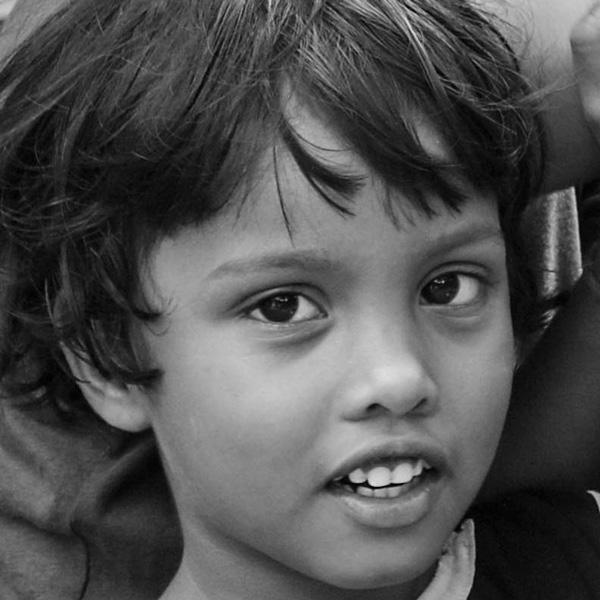

In [6]:
img = cv2.imread('/content/drive/MyDrive/dlib/image/training_real/real_00001.jpg',0)
cv2_imshow(img)

In [22]:
import cv2
def collect_num(image):

  gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  rects = detector(gray, 1)

  for (i,rect) in enumerate(rects):
    points = np.matrix([[p.x, p.y] for p in predictor(gray, rect).parts()])
    up_up_lip=points[list(range(48,55))]
    up_down_lip=points[list((47,60,61,62,63,64,54))]
    down_down_lip=points[list((47,60,67,66,65,64,54))]
    down_up_lip=points[list((47,59,58,57,56,55,54))]
    up_up_arr=[]
    up_down_arr=[]
    down_up_arr=[]
    down_down_arr=[]


    for (i,point) in enumerate(up_up_lip):
      x=point[0,0]
      y=point[0,0]+1
      a=[x,y]
      up_up_arr.append(a)
    for (i,point) in enumerate(up_down_lip):
      x=point[0,0]
      y=point[0,0]-1
      a=[x,y]
      up_down_arr.append(a)
    for (i,point) in enumerate(down_up_lip):
      x=point[0,0]
      y=point[0,0]+1
      a=[x,y]
      down_up_arr.append(a)
    for (i,point) in enumerate(down_down_lip):
      x=point[0,0]
      y=point[0,0]-1
      a=[x,y]
      down_down_arr.append(a)
  lip_num_arr=[up_up_arr,up_down_arr,down_up_arr,down_down_arr]
  return lip_num_arr


In [23]:
def line(a,b,x):
  y=a[1]+(x-a[0])*(b[1]-a[1])/(b[0]-a[0])
  return y